In [ ]:
#Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [2]:
#Twitter API Credentials
consumerKey = "AnZxfNFpuBNhi1ilHQoSu6eZC"
consumerSecret = "ch2cyTr5JdMDLMNMqZhmRCReljBeHvh1IzAk0fQpBOjQKMRyYT"
accessToken = "713639763228684289-VNP2ZnMv3wE77wBoiFyBLbNnlxZTZ2G"
accessTokenSecret = "kWWehfrmTs5QkttB1UpzNzw6kLxnv6QlNGQM6kFlmqqk9"

In [40]:
#Create the Authentication Object
auth = tweepy.OAuthHandler(consumer_key=consumerKey, consumer_secret=consumerSecret)
auth.set_access_token(accessToken,accessTokenSecret)
api=tweepy.API(auth)

#Extracting the tweets from twitter Hashtag
public_tweets=api.search('LaxmiBomb')
for tweet in public_tweets:
    print(tweet.text)
    analysis=TextBlob(tweet.text)
    print(analysis.sentiment)

#LaxmiBomb 🤷‍♀️ kahe banaya bhai? Akshay! 
Esay acha tho yeh flop movie dekh lenge https://t.co/uCsmBbhrwT
Sentiment(polarity=0.0, subjectivity=0.0)
Watching #LaxmiBomb  @akshaykumar,@advani_kiara. Laxmi Bomb is an a-ok movie, the role of @akshaykumar paji as Asif… https://t.co/HGK01kXHfh
Sentiment(polarity=0.0, subjectivity=0.0)
Wow 🔴 #LaxmiBomb #LaxmiiReview @akshaykumar superb story and subject. What a fantastic lesson to learn. Indeed movi… https://t.co/LTTmgqHAGZ
Sentiment(polarity=0.33333333333333337, subjectivity=0.8083333333333333)
#LaxmiBomb - another reminder that Bollywood, in real, is one of the most regressive industry. It's 2020, and they… https://t.co/TYuiJMy74C
Sentiment(polarity=0.35, subjectivity=0.4)
RT @RheaChakrabo420: #LaxmiBomb ने #DilBechara का कोई तो रिकॉर्ड तोड़ दिया है।
मैं न कहती थी कि "ये देश चुनौतियों से नहीं चूतियों से परेशान…
Sentiment(polarity=0.0, subjectivity=0.0)
RT @ShashankBharat_: Police brutality in Indore..
An Innocent man was beaten brutally wi

In [43]:
#Extracting 100 tweets from the twitter hashtag
posts=api.user_timeline(screen_name ="LaxmiBomb",count=100,lang="en",tweet_mode="extended")

#Print the last 10 tweets from the hashtag
print("10 recent tweets are :\n")
i=1
for tweet in posts[0:10]:
    print(str(i)+')'+tweet.full_text+'\n')
    i=i+1

10 recent tweets are :

1)@ManiaAkki @akshaykumar @Harry_Akkian @MegastarAkshay9 @khiladimukund @iPRADEEPTA @Pratapaman3 @Prithiviraj2020 hahaha...thanks for hearing us out though...;)

2)@mrsfunnybones you know how screaming the wrong name doesn't augur well? well, please tell your husband that his fans have been tagging us thinking we're part of the movie..btw...do check our music :)

3)@ManiaAkki @akshaykumar @Harry_Akkian @MegastarAkshay9 @khiladimukund @iPRADEEPTA @Pratapaman3 @Prithiviraj2020 stop freaking tagging the wrong laxmi bomb man...one makes kickass music....another makes dumbass movies

4)Pari by day :Pari by night 
#LaxmiBomb glows in the dark mixing bowl na ranti https://t.co/kUjiFTZyfj

5)@GopalDe60611533 https://t.co/nAY9e0zVlT it's here

6)We've got the perfect Friday night planned for you next week. 17th May at onestreetmumbai with @laxmibomb. It's going to be a party! 😊

#Repost gatecrashindia 
#livemusic #indiemusic… https://t.co/FJ99wKhwJr

7)Fresh off the @Azo

In [44]:
#Create a dataframe

df=pd.DataFrame([tweet.full_text for tweet in posts ],columns=['Tweets'])
df.head(9)

,Tweets
0,@ManiaAkki @akshaykumar @Harry_Akkian @Megasta...
1,@mrsfunnybones you know how screaming the wron...
2,@ManiaAkki @akshaykumar @Harry_Akkian @Megasta...
3,Pari by day :Pari by night \n#LaxmiBomb glows ...
4,@GopalDe60611533 https://t.co/nAY9e0zVlT it's ...
5,We've got the perfect Friday night planned for...
6,"Fresh off the @Azores, back to blast it in the..."
7,"Oh no, not again !!\n\n・・・\nFirst Day of #LAAX..."
8,the wedding dong song band https://t.co/ht1r62...


In [45]:
#Cleaning the Tweets

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) #Removing @mentions
    text = re.sub(r'#','', text ) #Removing the '#' symbol
    text = re.sub(r'https?:\/\/\S+','',text) #Remove the hyper link
    text = re.sub(r'RT[\s]+','',text) #Removing RT
    
    return text

#Cleaning the text 
df['Tweets'] = df['Tweets'].apply(cleanTxt)
df

,Tweets
0,_Akkian hahaha...thanks for hearing us ...
1,you know how screaming the wrong name doesn't...
2,_Akkian stop freaking tagging the wrong...
3,Pari by day :Pari by night \nLaxmiBomb glows i...
4,it's here
...,...
95,you boys... I mean thank you boys!
96,Play it loud
97,When Jimmy does a Bobby at a party blowjobbyde...
98,'Bolly si Surat'


In [46]:
#Create a function to get the Subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the Polarity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create Two new columns
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

#Show New DF with New Columns
df

,Tweets,Subjectivity,Polarity
0,_Akkian hahaha...thanks for hearing us ...,1.0000,0.250000
1,you know how screaming the wrong name doesn't...,0.9500,0.000000
2,_Akkian stop freaking tagging the wrong...,0.9000,-0.500000
3,Pari by day :Pari by night \nLaxmiBomb glows i...,0.4000,-0.150000
4,it's here,0.0000,0.000000
...,...,...,...
95,you boys... I mean thank you boys!,0.6875,-0.390625
96,Play it loud,0.8000,0.100000
97,When Jimmy does a Bobby at a party blowjobbyde...,0.0000,0.000000
98,'Bolly si Surat',0.0000,0.000000


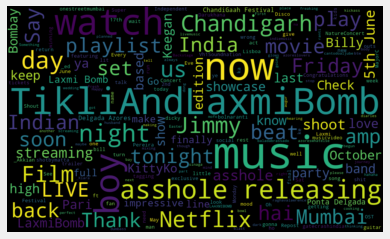

In [47]:
#Plot the Word Cloud
allWords = ' '.join([tweets for tweets in df['Tweets']])
wordCloud = WordCloud(width=1000, height=600,random_state=21, max_font_size=119,background_color='black').generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [48]:
#Create a function to compute the negative,neutral and positive analysis

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis']=df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,_Akkian hahaha...thanks for hearing us ...,1.0000,0.250000,Positive
1,you know how screaming the wrong name doesn't...,0.9500,0.000000,Neutral
2,_Akkian stop freaking tagging the wrong...,0.9000,-0.500000,Negative
3,Pari by day :Pari by night \nLaxmiBomb glows i...,0.4000,-0.150000,Negative
4,it's here,0.0000,0.000000,Neutral
...,...,...,...,...
95,you boys... I mean thank you boys!,0.6875,-0.390625,Negative
96,Play it loud,0.8000,0.100000,Positive
97,When Jimmy does a Bobby at a party blowjobbyde...,0.0000,0.000000,Neutral
98,'Bolly si Surat',0.0000,0.000000,Neutral


In [49]:
#Print all the Positive Tweets

j=1 
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Positive'):
       print(str(j)+ ') '+sortedDF['Tweets'][i])
       print()
       j = j+1

1)   _Akkian      hahaha...thanks for hearing us out though...;)

2) We've got the perfect Friday night planned for you next week. 17th May at onestreetmumbai with . It's going to be a party! 😊

Repost gatecrashindia 
livemusic indiemusic… 

3) Fresh off the , back to blast it in the bay. Friday the 17th. 
LIVE in Mumbai. onestreetmumbai 

4) Oh no, not again !!

・・・
First Day of LAAXMIBOMB 💥   raghavalawrence  and the journey has just begun 👻🔥
・・・
Repost _Kiara 

5) Happy Easter mofo's 

6) cantodoaljube the place to be baladabrassado on my mind, body and playlist right now. Something's always cooking, maybe a new song in the making soon. @ Ponta Delgada, Azores 

7) There's a rumour of a tremor, this summer. Who knows if it's true... 

8) A world of good comes out, when music keeps the underground and overground on their feet.
.
Elite and a little.
.
Antilla and Darukhana. 
.
The highs and lows of South Bombay.
.
Beneath… 

9) In the name of the Abba, the beta and the Holy Spirit.
pe

In [50]:
#Print the Negative Tweets 
j=1 
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Negative'):
       print(str(j)+ ') '+sortedDF['Tweets'][i])
       print()
       j = j+1

1)   _Akkian      stop freaking tagging the wrong laxmi bomb man...one makes kickass music....another makes dumbass movies

2) Pari by day :Pari by night 
LaxmiBomb glows in the dark mixing bowl na ranti 

3) :  the provocative auteur behind multi award-winning Tikli &amp; Laxmi Bomb, joins us TONIGHT, Fri 5 Apr, to t…

4) Kenny n Khan
Bector n Birla 
We are from Bombay,
Guess the rest are from Kerala. 

Tonight at AwestungReloaded we'll play a little game of Chinese Whispers. See ya! @ High Street Phoenix 

5) Small talk 

6) Billy Billy Billy bill-i bill-i wonder,
Don't give a shit cos it keeps getting louder.
Some days, on days like this,
When I don't give a shit,
And I keep getting prouder.
Some days now… 

7) minus the makeup 

8) Slight rewind to last night's drink and draw hosted by _ugs x rivenis at Heroes Gaming Lounge . 
Rocking that  tee 👕
Shout outs to  and my "assistant" Paulette… 

9) run dicky dicky
drumroll tricky
boy bash bass 
till the beat get slicky

asshole releasi

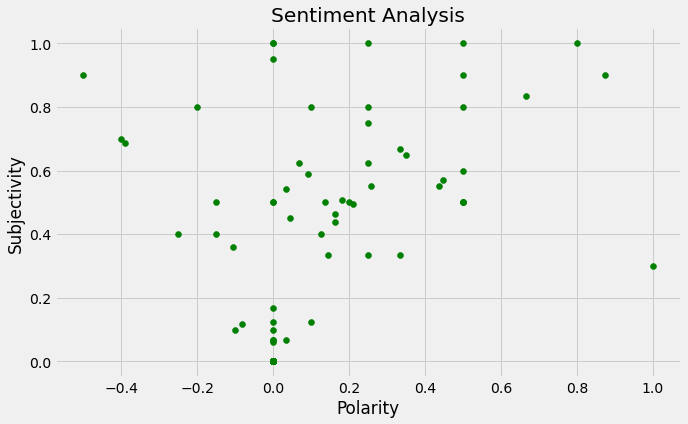

In [51]:
#Plotting the Polarity and Subjectivity
plt.figure(figsize=(10,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Green')
    
    plt.title('Sentiment Analysis')
    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')
    plt.show

In [52]:
#Percentage of Positive Tweets
positive_tweets=df[df.Analysis=='Positive']
positive_tweets=positive_tweets['Tweets']
percentage=round(positive_tweets.shape[0]/df.shape[0]*100, 1)
print('Percentage of Positive tweets: ',percentage)

Percentage of Positive tweets:  37.0


In [53]:
#Percentage of Negative Tweets
negative_tweets=df[df.Analysis=='Negative']
negative_tweets=negative_tweets['Tweets']
percentage=round(negative_tweets.shape[0]/df.shape[0]*100, 1)
print('Percentage of Negative tweets: ',percentage)

Percentage of Negative tweets:  10.0


<function matplotlib.pyplot.show(*args, **kw)>

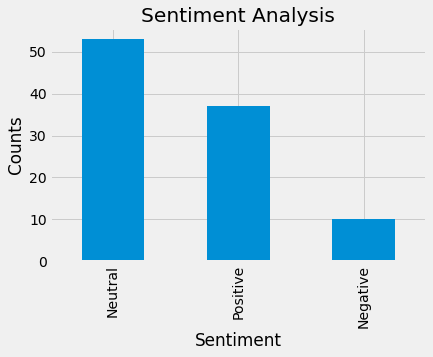

In [54]:
df['Analysis'].value_counts()
#plotting and visualise the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show

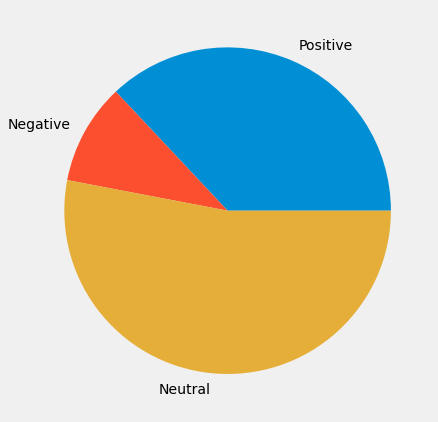

In [55]:
# Creating a pie-chart 
sentiment = ['Positive', 'Negative', 'Neutral'] 
  
counts = [37,10,53] 
  
# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(counts, labels = sentiment) 
  
# show plot 
plt.show() 